# Explore search results with GeoPandas

The G-Portal Catalogue Service returns products with numerous metadata in GeoJSON format.

[GeoPandas](https://geopandas.org/) is a library to work with such data.

In [1]:
import gportal
import geopandas as gpd

In [2]:
%config InlineBackend.figure_formats = ['retina']

## Convert search results into GeoDataFrame

Search for GCOM-C Level 2 SST products near Tokyo in January 2023.

In [3]:
aoi = [140, 30, 145, 35]  # area of interest

In [4]:
datasets = gportal.datasets()

In [5]:
res = gportal.search(
    dataset_ids=datasets["GCOM-C/SGLI"]["LEVEL2"]["Oceanic sphere"]["L2-SST"],
    start_time="2023-01-01T00:00:00",
    end_time="2023-01-31T23:59:59",
    bbox=aoi,
)
res.matched()

206

`Product` represents a GeoJSON, but its properties are nested.
`GeoDataFrame` is not suited for handling nested properties.

In [6]:
product = next(res.products())
product.properties

{'identifier': 'GC1SG1_202301010122E04710_L2SG_SSTDK_3001',
 'acquisitionType': 'NOMINAL',
 'imageQualityDegradation': '',
 'imageQualityDegradationQuotationMode': '',
 'processingDate': '2023-01-01T15:20:47.00Z',
 'processingLevel': 'L2',
 'ProductType': 'S',
 'status': 'ARCHIVED',
 'beginPosition': '2023-01-01T01:21:56.94Z',
 'endPosition': '2023-01-01T01:26:44.51Z',
 'platformShortName': 'GCOM-C',
 'instrumentShortName': 'SGLI',
 'sensorType': 'OPTICAL',
 'operationalMode': 'NOMINAL',
 'resolution': '',
 'orbitNumber': '047',
 'lastOrbitNumber': '',
 'DayNight': '',
 'illuminationAzimuthAngle': '',
 'illuminationElevationAngle': '',
 'multiExtentOf': '134.51026916503906 46.44524002075195 140.54034423828125 45.92348480224609 144.48358154296875 45.40235137939453 148.24114990234375 44.76785278320313 153.32365417480469 43.68489837646484 154.52767944335938 43.38881301879883 153.22018432617188 40.91696929931641 152.01185607910156 38.42909622192383 150.88957214355469 35.92721176147461 149.

`Product` has a utility method to flatten the nested properties.

In [7]:
product.flatten_properties()

{'identifier': 'GC1SG1_202301010122E04710_L2SG_SSTDK_3001',
 'acquisitionType': 'NOMINAL',
 'imageQualityDegradation': '',
 'imageQualityDegradationQuotationMode': '',
 'processingDate': '2023-01-01T15:20:47.00Z',
 'processingLevel': 'L2',
 'ProductType': 'S',
 'status': 'ARCHIVED',
 'beginPosition': '2023-01-01T01:21:56.94Z',
 'endPosition': '2023-01-01T01:26:44.51Z',
 'platformShortName': 'GCOM-C',
 'instrumentShortName': 'SGLI',
 'sensorType': 'OPTICAL',
 'operationalMode': 'NOMINAL',
 'resolution': '',
 'orbitNumber': '047',
 'lastOrbitNumber': '',
 'DayNight': '',
 'illuminationAzimuthAngle': '',
 'illuminationElevationAngle': '',
 'multiExtentOf': '134.51026916503906 46.44524002075195 140.54034423828125 45.92348480224609 144.48358154296875 45.40235137939453 148.24114990234375 44.76785278320313 153.32365417480469 43.68489837646484 154.52767944335938 43.38881301879883 153.22018432617188 40.91696929931641 152.01185607910156 38.42909622192383 150.88957214355469 35.92721176147461 149.

Let's convert the search results into a GeoDataFrame.

In [8]:
features = [product.to_dict(flatten_properties=True) for product in res.products()]

In [9]:
raw_gdf = gpd.GeoDataFrame.from_features(features, crs="EPSG:4326")
raw_gdf.head()

geometry  \
0  POLYGON ((134.51027 46.44524, 140.54034 45.923...   
1  POLYGON ((131.72821 31.57977, 136.59933 31.066...   
2  POLYGON ((134.50012 46.44913, 140.53572 45.927...   
3  POLYGON ((131.72015 31.58377, 136.59555 31.070...   
4  POLYGON ((150.12608 29.76472, 145.34557 29.249...   

                                  identifier acquisitionType  \
0  GC1SG1_202301010122E04710_L2SG_SSTDK_3001         NOMINAL   
1  GC1SG1_202301010126J04711_L2SG_SSTDK_3001         NOMINAL   
2  GC1SG1_202301010122E04710_L2SG_SSTDQ_3001         NOMINAL   
3  GC1SG1_202301010126J04711_L2SG_SSTDQ_3001         NOMINAL   
4  GC1SG1_202301011239J28503_L2SG_SSTNK_3001         NOMINAL   

  imageQualityDegradation imageQualityDegradationQuotationMode  \
0                                                                
1                                                                
2                                                                
3                                                                
4                                                                

            processingDate processingLevel ProductType    status  \
0  2023-01-01T15:20:47.00Z              L2           S  ARCHIVED   
1  2023-01-01T15:20:48.00Z              L2           S  ARCHIVED   
2  2023-01-01T15:20:47.00Z              L2           S  ARCHIVED   
3  2023-01-01T15:20:49.00Z              L2           S  ARCHIVED   
4  2023-01-02T03:12:50.00Z              L2           S  ARCHIVED   

             beginPosition  ...          sceneCenterTime  \
0  2023-01-01T01:21:56.94Z  ...  2023-01-01T01:24:20.73Z   
1  2023-01-01T01:26:09.34Z  ...  2023-01-01T01:28:33.13Z   
2  2023-01-01T01:21:56.88Z  ...  2023-01-01T01:24:20.73Z   
3  2023-01-01T01:26:09.28Z  ...  2023-01-01T01:28:33.13Z   
4  2023-01-01T12:39:08.53Z  ...  2023-01-01T12:41:32.32Z   

  startSubsatellitePosition endSubsatellitePosition ProcessTimeUnit tileHNo  \
0                                                                             
1                                                                             
2                                                                             
3                                                                             
4                                                                             

  tileVNo topicCategory organizationName pseq hasProduct  
0                     -             JAXA   EQ       true  
1                     -             JAXA   EQ       true  
2                     -             JAXA   EQ       true  
3                     -             JAXA   EQ       true  
4                     -             JAXA   EQ       true  

[5 rows x 67 columns]

## Filter products by specific conditions

There are too many columns, so we will remove columns that have the same value in all rows.

In [10]:
nunique = raw_gdf.nunique()
nunique[nunique > 1]

geometry                206
identifier              206
processingDate          155
beginPosition           206
endPosition             206
orbitNumber              59
multiExtentOf           206
centerOf                206
productFileName         206
productSize              59
browse-br               206
browse-sb               206
browse-thm              206
cloudCoverPercentage     58
Resolution                2
browseImageSize         172
sceneNumber               4
startPathNumber          59
endPathNumber            59
orbitDirection            2
sceneCenterTime         103
dtype: int64

Furthermore, we will select only the necessary columns from within this columns.

In [11]:
gdf = raw_gdf[
    [
        "geometry",
        "identifier",
        "Resolution",
        "beginPosition",
        "endPosition",
        "orbitNumber",
        "sceneNumber",
        "orbitDirection",
        "cloudCoverPercentage",
        "browse-br",
        "productFileName",
    ]
]
gdf.head()

geometry  \
0  POLYGON ((134.51027 46.44524, 140.54034 45.923...   
1  POLYGON ((131.72821 31.57977, 136.59933 31.066...   
2  POLYGON ((134.50012 46.44913, 140.53572 45.927...   
3  POLYGON ((131.72015 31.58377, 136.59555 31.070...   
4  POLYGON ((150.12608 29.76472, 145.34557 29.249...   

                                  identifier Resolution  \
0  GC1SG1_202301010122E04710_L2SG_SSTDK_3001        1km   
1  GC1SG1_202301010126J04711_L2SG_SSTDK_3001        1km   
2  GC1SG1_202301010122E04710_L2SG_SSTDQ_3001       250m   
3  GC1SG1_202301010126J04711_L2SG_SSTDQ_3001       250m   
4  GC1SG1_202301011239J28503_L2SG_SSTNK_3001        1km   

             beginPosition              endPosition orbitNumber sceneNumber  \
0  2023-01-01T01:21:56.94Z  2023-01-01T01:26:44.51Z         047          10   
1  2023-01-01T01:26:09.34Z  2023-01-01T01:30:56.92Z         047          11   
2  2023-01-01T01:21:56.88Z  2023-01-01T01:26:44.57Z         047          10   
3  2023-01-01T01:26:09.28Z  2023-01-01T01:30:56.97Z         047          11   
4  2023-01-01T12:39:08.53Z  2023-01-01T12:43:56.11Z         285          03   

  orbitDirection cloudCoverPercentage  \
0     Descending                   68   
1     Descending                   71   
2     Descending                   68   
3     Descending                   71   
4      Ascending                   24   

                                           browse-br  \
0  https://gportal.jaxa.jp/gpr/img/br/GC1SG1_2023...   
1  https://gportal.jaxa.jp/gpr/img/br/GC1SG1_2023...   
2  https://gportal.jaxa.jp/gpr/img/br/GC1SG1_2023...   
3  https://gportal.jaxa.jp/gpr/img/br/GC1SG1_2023...   
4  https://gportal.jaxa.jp/gpr/img/br/GC1SG1_2023...   

                                     productFileName  
0  https://gportal.jaxa.jp/download/standard/GCOM...  
1  https://gportal.jaxa.jp/download/standard/GCOM...  
2  https://gportal.jaxa.jp/download/standard/GCOM...  
3  https://gportal.jaxa.jp/download/standard/GCOM...  
4  https://gportal.jaxa.jp/download/standard/GCOM...

Filter by the condition: "high resolution (250m)" and "low cloud cover (< 20%)".

In [12]:
filtered_gdf = gdf[(gdf["Resolution"] == "250m") & (gdf["cloudCoverPercentage"].astype(int) < 20)]
filtered_gdf

geometry  \
7    POLYGON ((152.97382 14.89464, 148.68237 14.336...   
15   POLYGON ((159.65588 14.89468, 155.36447 14.336...   
26   POLYGON ((144.94542 29.76209, 140.16090 29.246...   
27   POLYGON ((147.78401 14.89459, 143.49245 14.336...   
35   POLYGON ((154.46617 14.89463, 150.17471 14.336...   
43   POLYGON ((161.14854 14.89462, 156.85713 14.336...   
70   POLYGON ((141.25185 29.76169, 136.46707 29.245...   
71   POLYGON ((144.08961 14.89424, 139.79781 14.336...   
78   POLYGON ((147.93448 29.76200, 143.14995 29.246...   
79   POLYGON ((150.77228 14.89435, 146.48073 14.336...   
87   POLYGON ((157.45547 14.89429, 153.16399 14.336...   
115  POLYGON ((158.95430 14.89438, 154.66281 14.336...   
127  POLYGON ((147.08699 14.89434, 142.79532 14.336...   
134  POLYGON ((150.93350 29.76196, 146.14900 29.246...   
135  POLYGON ((153.77135 14.89437, 149.47983 14.336...   
143  POLYGON ((160.45599 14.89434, 156.16451 14.336...   
156  POLYGON ((152.43758 29.76186, 147.65305 29.246...   
157  POLYGON ((155.27483 14.89417, 150.98328 14.336...   
168  POLYGON ((140.56821 29.76042, 135.78242 29.244...   
169  POLYGON ((143.40529 14.89358, 139.11232 14.335...   
177  POLYGON ((150.08115 14.89367, 145.78853 14.336...   
185  POLYGON ((156.75751 14.89375, 152.46500 14.336...   
196  POLYGON ((142.03714 29.76054, 137.25154 29.244...   
197  POLYGON ((144.87433 14.89359, 140.58154 14.335...   
205  POLYGON ((151.55061 14.89376, 147.25812 14.336...   

                                    identifier Resolution  \
7    GC1SG1_202301011235E28502_L2SG_SSTNQ_3001       250m   
15   GC1SG1_202301021208L27602_L2SG_SSTNQ_3001       250m   
26   GC1SG1_202301041300E29203_L2SG_SSTNQ_3001       250m   
27   GC1SG1_202301041256A29202_L2SG_SSTNQ_3001       250m   
35   GC1SG1_202301051229F28302_L2SG_SSTNQ_3001       250m   
43   GC1SG1_202301061202M27402_L2SG_SSTNQ_3001       250m   
70   GC1SG1_202301111315A29703_L2SG_SSTNQ_3001       250m   
71   GC1SG1_202301111310S29702_L2SG_SSTNQ_3001       250m   
78   GC1SG1_202301121248F28803_L2SG_SSTNQ_3001       250m   
79   GC1SG1_202301121244B28802_L2SG_SSTNQ_3001       250m   
87   GC1SG1_202301131217H27902_L2SG_SSTNQ_3001       250m   
115  GC1SG1_202301171211H27702_L2SG_SSTNQ_3001       250m   
127  GC1SG1_202301191258T29302_L2SG_SSTNQ_3001       250m   
134  GC1SG1_202301201236G28403_L2SG_SSTNQ_3001       250m   
135  GC1SG1_202301201232C28402_L2SG_SSTNQ_3001       250m   
143  GC1SG1_202301211205H27502_L2SG_SSTNQ_3001       250m   
156  GC1SG1_202301241230G28203_L2SG_SSTNQ_3001       250m   
157  GC1SG1_202301241226C28202_L2SG_SSTNQ_3001       250m   
168  GC1SG1_202301261317S29803_L2SG_SSTNQ_3001       250m   
169  GC1SG1_202301261313N29802_L2SG_SSTNQ_3001       250m   
177  GC1SG1_202301271246U28902_L2SG_SSTNQ_3001       250m   
185  GC1SG1_202301281220E28002_L2SG_SSTNQ_3001       250m   
196  GC1SG1_202301301311V29603_L2SG_SSTNQ_3001       250m   
197  GC1SG1_202301301307R29602_L2SG_SSTNQ_3001       250m   
205  GC1SG1_202301311241A28702_L2SG_SSTNQ_3001       250m   

               beginPosition              endPosition orbitNumber sceneNumber  \
7    2023-01-01T12:34:56.22Z  2023-01-01T12:39:43.91Z         285          02   
15   2023-01-02T12:08:12.82Z  2023-01-02T12:13:00.51Z         276          02   
26   2023-01-04T12:59:55.00Z  2023-01-04T13:04:42.69Z         292          03   
27   2023-01-04T12:55:42.75Z  2023-01-04T13:00:30.44Z         292          02   
35   2023-01-05T12:28:59.25Z  2023-01-05T12:33:46.94Z         283          02   
43   2023-01-06T12:02:15.75Z  2023-01-06T12:07:03.44Z         274          02   
70   2023-01-11T13:14:43.54Z  2023-01-11T13:19:31.22Z         297          03   
71   2023-01-11T13:10:31.28Z  2023-01-11T13:15:18.97Z         297          02   
78   2023-01-12T12:47:59.80Z  2023-01-12T12:52:47.48Z         288          03   
79   2023-01-12T12:43:47.54Z  2023-01-12T12:48:35.23Z         288          02   
87   2023-01-13T12:17:03.78Z  2023-01-13T12:21:51.47Z      

## Visualize the results on an interactive map

Visualize the product coverage areas and the AOI using `GeoDataFrame.explore`.

In [13]:
import folium

map = filtered_gdf.explore("identifier", legend=False, popup=True, style_kwds={"fillOpacity": 0.1})
folium.Rectangle(bounds=[(aoi[1], aoi[0]), (aoi[3], aoi[2])]).add_to(map)
map

Products with orbit numbers 282-288 and scene number 3 covers the entire AOI.

Let's take a look at their browse images.

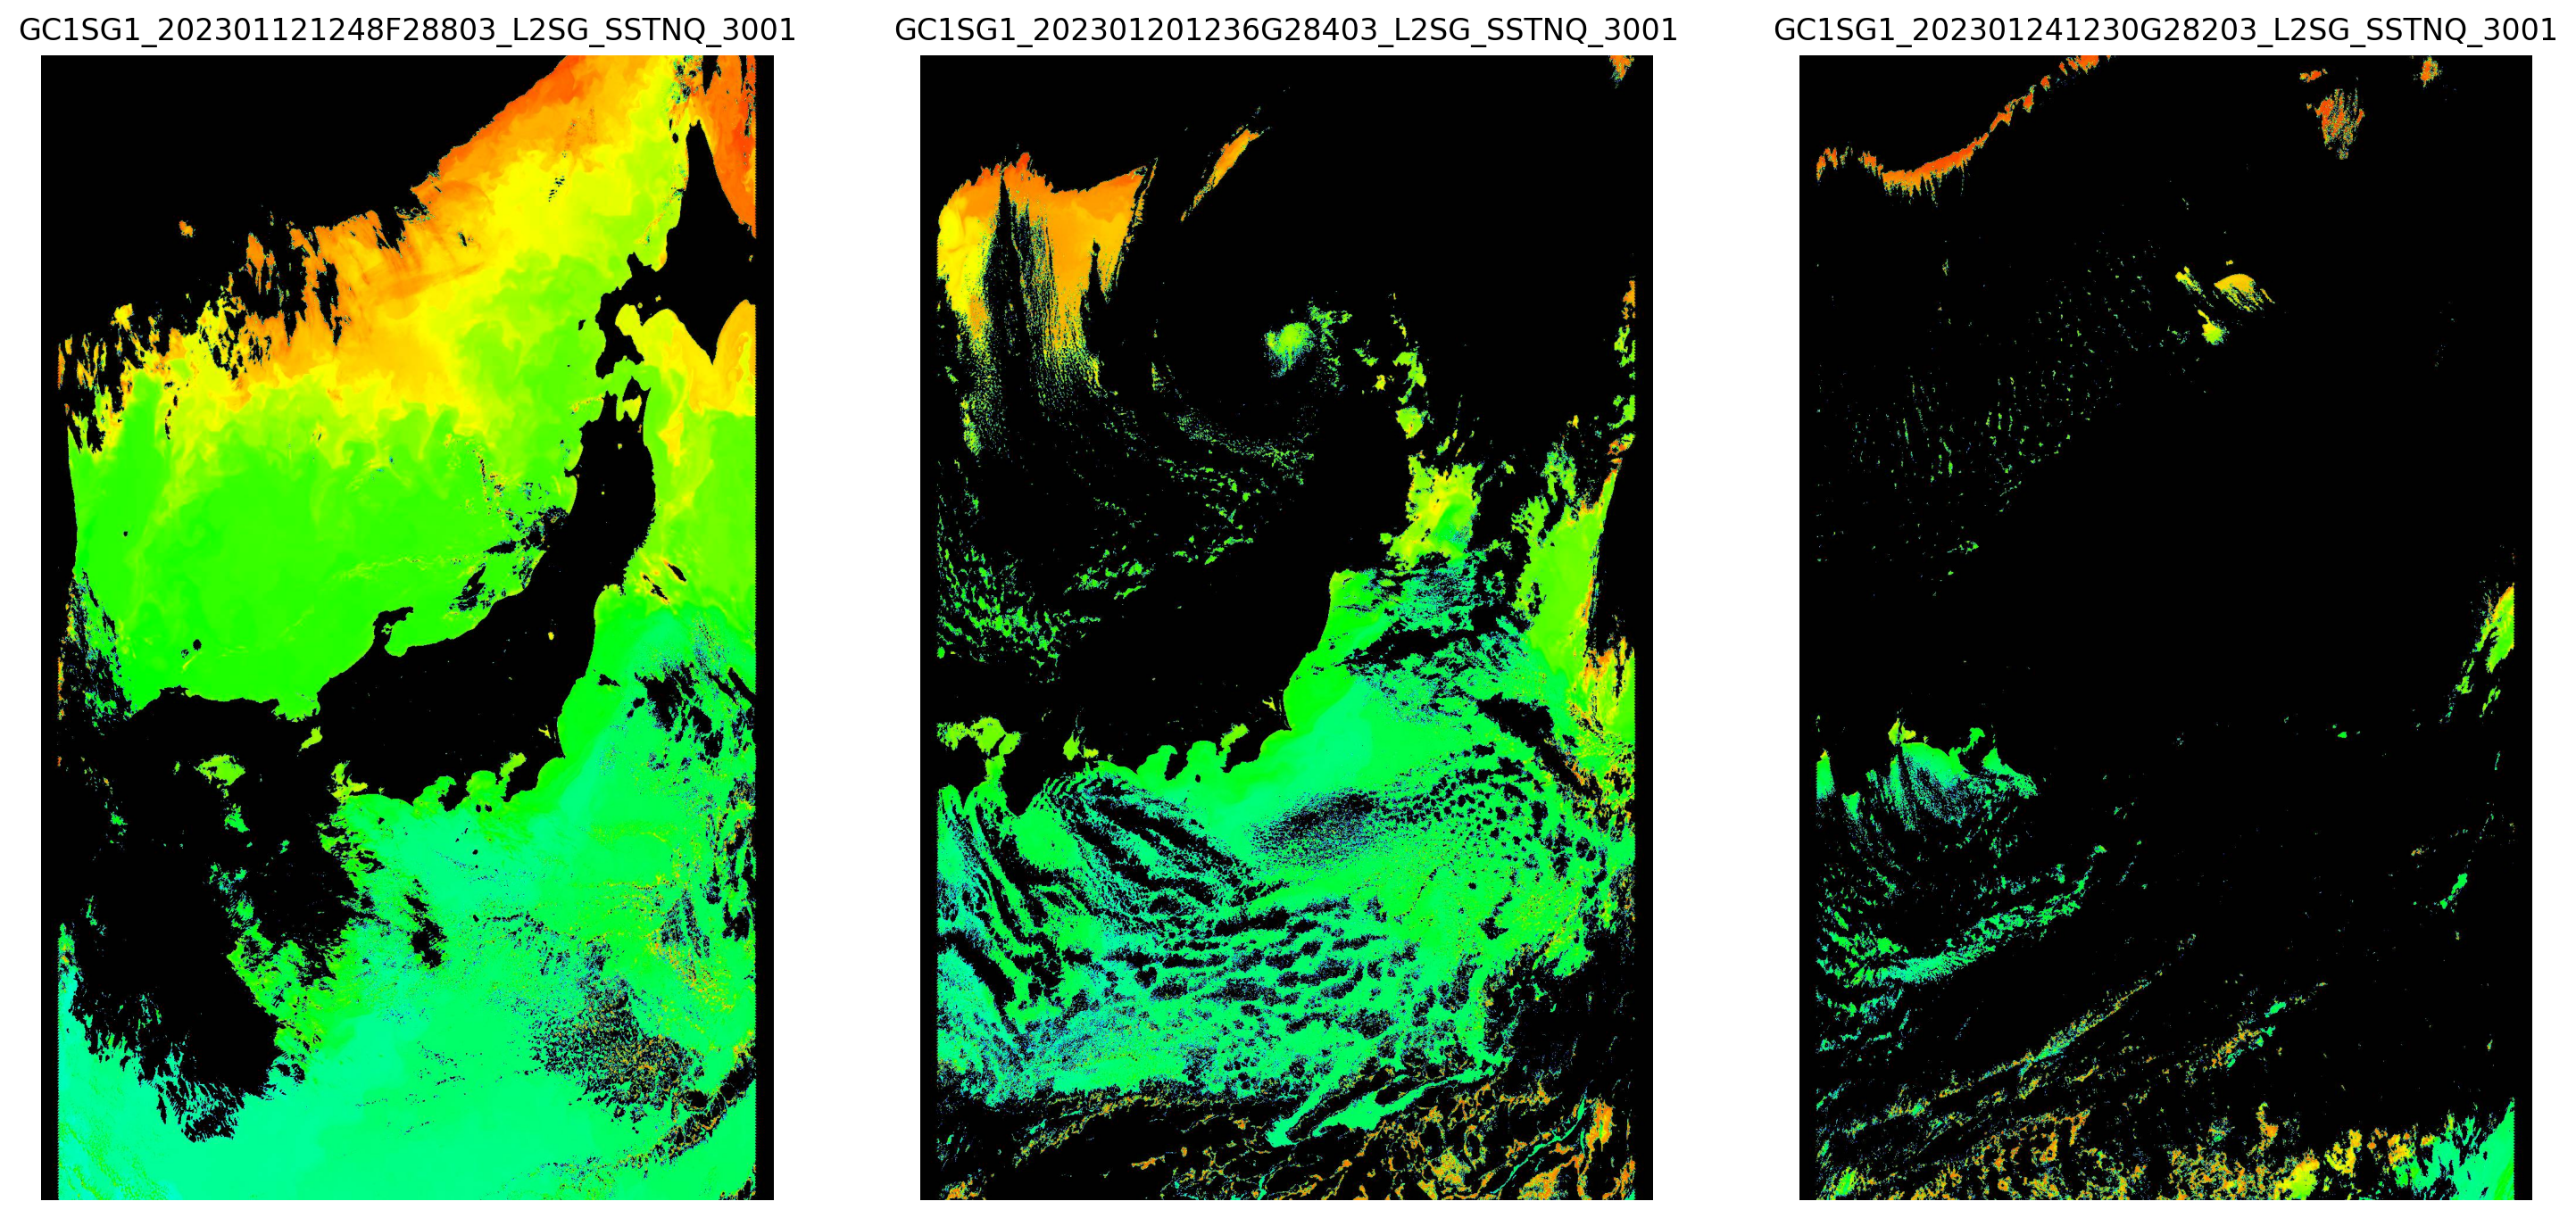

In [14]:
from urllib.request import urlopen

import matplotlib.pyplot as plt
import numpy as np
import shapely.geometry

target_gdf = filtered_gdf[filtered_gdf.covers(shapely.geometry.box(*aoi))]

fig, axs = plt.subplots(1, 3, figsize=(18, 9))
for (i, row), ax in zip(target_gdf.iterrows(), axs):
    with urlopen(row["browse-br"]) as f:
        img = plt.imread(f, format="jpg")
    ax.imshow(np.flip(img))
    ax.set_axis_off()
    ax.set_title(row["identifier"])

The left one seems to be good.